In [1]:
import sys
sys.version

'2.7.15 | packaged by conda-forge | (default, Jul  2 2019, 00:39:44) \n[GCC 7.3.0]'

In [2]:
import cmpy
cmpy

<module 'cmpy' from '/srv/conda/envs/kernel/lib/python2.7/site-packages/cmpy/__init__.pyc'>

In [3]:
cmpy.cmpyParams

{'atol': 1.000000000000001e-12,
 'block_entropy_method': 'msp',
 'include_forbidden': True,
 'logs': True,
 'probability_method': 'array',
 'rtol': 1.000000000000001e-10,
 'show': 'external',
 'sparse': True,
 'text.font': 'ascii',
 'text.usetex': False,
 'transducers.error': 0,
 'use_logs': True}

In [4]:
m = cmpy.machines.Even()

In [5]:
import dit
dit.__version__

'1.2.3'

In [6]:
import numpy as np
np.__version__

'1.16.5'

In [7]:
import pygraphviz
pygraphviz.__version__

'1.5'

In [8]:
import openmdao
openmdao.__version__

'1.7.4'

openmdao example from https://openmdao.readthedocs.io/en/1.7.3/usr-guide/tutorials/paraboloid-tutorial.html

In [9]:
from __future__ import print_function

from openmdao.api import IndepVarComp, Component, Problem, Group

class Paraboloid(Component):
    """ Evaluates the equation f(x,y) = (x-3)^2 + xy + (y+4)^2 - 3 """

    def __init__(self):
        super(Paraboloid, self).__init__()

        self.add_param('x', val=0.0)
        self.add_param('y', val=0.0)

        self.add_output('f_xy', shape=1)

    def solve_nonlinear(self, params, unknowns, resids):
        """f(x,y) = (x-3)^2 + xy + (y+4)^2 - 3
        """

        x = params['x']
        y = params['y']

        unknowns['f_xy'] = (x-3.0)**2 + x*y + (y+4.0)**2 - 3.0

    def linearize(self, params, unknowns, resids):
        """ Jacobian for our paraboloid."""

        x = params['x']
        y = params['y']
        J = {}

        J['f_xy', 'x'] = 2.0*x - 6.0 + y
        J['f_xy', 'y'] = 2.0*y + 8.0 + x
        return J


top = Problem()

root = top.root = Group()

root.add('p1', IndepVarComp('x', 3.0))
root.add('p2', IndepVarComp('y', -4.0))
root.add('p', Paraboloid())

root.connect('p1.x', 'p.x')
root.connect('p2.y', 'p.y')

top.setup()
top.run()

print(top['p.f_xy'])

##############################################
Setup: Checking root problem for potential issues...

No recorders have been specified, so no data will be saved.

Setup: Check of root problem complete.
##############################################

-15.0


In [10]:
top.check_partial_derivatives()

Partial Derivatives Check

----------------
Component: 'p'
----------------
  p: 'f_xy' wrt 'x'

    Forward Magnitude : 4.000000e+00
    Reverse Magnitude : 4.000000e+00
         Fd Magnitude : 3.999999e+00 (fd:forward)

    Absolute Error (Jfor - Jfd) : 9.995298e-07
    Absolute Error (Jrev - Jfd) : 9.995298e-07
    Absolute Error (Jfor - Jrev): 0.000000e+00

    Relative Error (Jfor - Jfd) : 2.498825e-07
    Relative Error (Jrev - Jfd) : 2.498825e-07
    Relative Error (Jfor - Jrev): 0.000000e+00

    Raw Forward Derivative (Jfor)

[[-4.]]

    Raw Reverse Derivative (Jrev)

[[-4.]]

    Raw FD Derivative (Jfd)

[[-3.999999]]

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
  p: 'f_xy' wrt 'y'

    Forward Magnitude : 3.000000e+00
    Reverse Magnitude : 3.000000e+00
         Fd Magnitude : 3.000001e+00 (fd:forward)

    Absolute Error (Jfor - Jfd) : 9.996201e-07
    Absolute Error (Jrev - Jfd) : 9.996201e-07
    Absolute Error (Jfor - Jrev): 0.000000e+00

    Relative 

{'p': {('f_xy', 'x'): {'J_fd': array([[-3.999999]]),
   'J_fwd': array([[-4.]]),
   'J_rev': array([[-4.]]),
   'abs error': (9.99529788714426e-07, 9.99529788714426e-07, 0.0),
   'magnitude': (4.0, 4.0, 3.9999990004702113),
   'rel error': (2.498825096198595e-07, 2.498825096198595e-07, 0.0)},
  ('f_xy', 'y'): {'J_fd': array([[3.000001]]),
   'J_fwd': array([[3.]]),
   'J_rev': array([[3.]]),
   'abs error': (9.99620056063577e-07, 9.99620056063577e-07, 0.0),
   'magnitude': (3.0, 3.0, 3.000000999620056),
   'rel error': (3.332065743278675e-07, 3.332065743278675e-07, 0.0)}}}

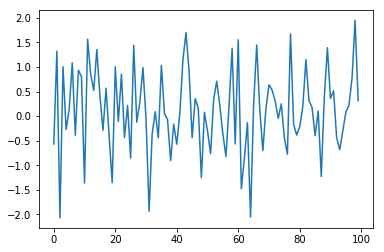

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.random.randn(100))